In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [222]:
Nx = 100
start = 0.
end = 1.
x = np.linspace(start,end,Nx,endpoint = False)
dx = (end-start)/Nx
a1 = 1.
a2 = -1.
CF = 2.**(-3)
dt = CF*dx
t = 0.
print(dx)

0.01


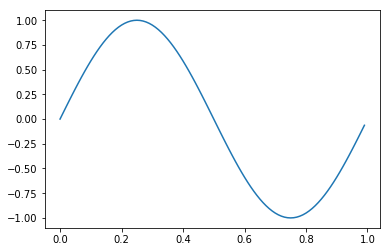

In [223]:
u_test = np.sin(2*np.pi*(x-t))
plt.plot(x, u_test)

In [229]:
def du_dx_periodic(u,a,dx):
    du = np.zeros(len(u))
    if a > 0:
        du[1:] = u[1:] - u[:-1]
        du[0] = u[0] - u[-1]
    if a < 0:
        du[:-1] = u[:-1]-u[1:]
        du[-1] = u[-1] - u[0]
        du = -du
    return du/dx

In [230]:
du_dx_test = du_dx_periodic(u_test, -1,dx)

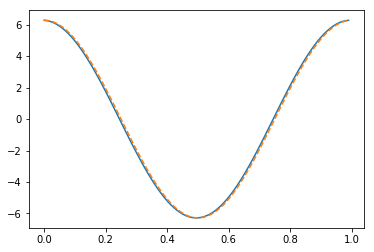

In [231]:
plt.plot(x, du_dx_test)
plt.plot(x, 2*np.pi*np.cos(2*np.pi*x),linestyle ='--')

In [232]:
def u_ana(x,t,sigma,x0):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-t-x0)**2/(2*sigma**2))
def v_ana(x,t):
    return 0*x

In [246]:
def d_dt(u,a,dx,dt,du_dx, v):
    if v == None:
        v = np.zeros(len(u))
    d_dt = -a*du_dx(u,a,dx) + v
    return d_dt

In [247]:
def RK4_step(u,a, dx,dt,du_dx,du_dt,v = None):
    w1 = du_dt(u,            a,dx,dt,du_dx, v)
    w2 = du_dt(u + 0.5*dt*w1,a,dx,dt,du_dx, v)
    w3 = du_dt(u + 0.5*dt*w2,a,dx,dt,du_dx, v)
    w4 = du_dt(u + dt*w3    ,a,dx,dt,du_dx, v)
    return u + dt*(w1 + 2.0*w2 + 2.0*w3 + w4)/6.0

In [248]:
t = 0 
t_target = 0.3
u_test = np.sin(2*np.pi*(x-t))
nt = int((t_target-t)/dt)
print (nt)

240


In [249]:
for i in range(nt):
    u_test = RK4_step(u_test, a2, dx,dt,du_dx_periodic, d_dt, None)
    t += dt
print(t)

0.2999999999999991


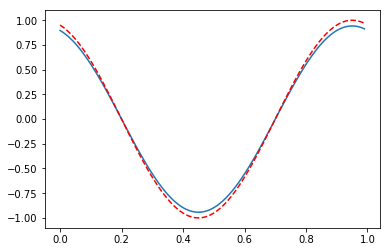

In [250]:
plt.plot(x,u_test)
plt.plot(x,np.sin(2*np.pi*(x+0.3)), color= 'red', linestyle = '--')

In [255]:
def du_dx_radiative(u,a,dx):
    du = np.zeros(len(u))
    if a > 0:
        du[1:] = u[1:] - u[:-1]
        du[0] = u[0]
    if a < 0:
        du[:-1] = u[:-1]-u[1:]
        du[-1] = u[-1]
        du = -du
    return du/dx

In [256]:
t = 0 
t_target = 0.3
u_test = np.sin(2*np.pi*(x-t))
nt = int((t_target-t)/dt)
print (nt)

240


In [257]:
for i in range(nt):
    u_test = RK4_step(u_test, a2, dx,dt,du_dx_radiative, d_dt, None)
    t += dt
print(t)

0.2999999999999991


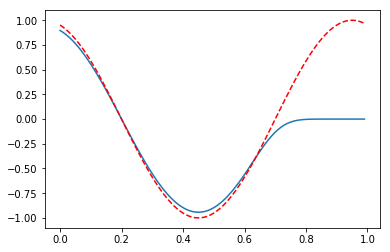

In [258]:
plt.plot(x,u_test)
plt.plot(x,np.sin(2*np.pi*(x+0.3)), color= 'red', linestyle = '--')